<a href="https://colab.research.google.com/github/karaage0703/covid19_memo/blob/master/covid19_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 新型コロナウイルスの感染状況を分析するためのノートブック

データを可視化するために、個人的に作成しているものです。

内容の正確性を保証するものではありませんので、ご注意下さい。


以下リポジトリでPR受付中です。

https://github.com/karaage0703/covid19_memo

# 変更履歴
- 2020/03/23 データ更新
- 2020/03/07 13:42 データ更新


## データのダウンロード

以下のオープンデータを使用（Google Spread Sheet)

https://docs.google.com/spreadsheets/d/1jfB4muWkzKTR0daklmf8D5F0Uf_IYAgcx_-Ij9McClQ/edit#gid=0

In [2]:
!wget --no-check-certificate --output-document=covid19jp.csv 'https://docs.google.com/spreadsheets/d/1jfB4muWkzKTR0daklmf8D5F0Uf_IYAgcx_-Ij9McClQ/export?gid=0&format=csv'

--2020-03-23 13:37:34--  https://docs.google.com/spreadsheets/d/1jfB4muWkzKTR0daklmf8D5F0Uf_IYAgcx_-Ij9McClQ/export?gid=0&format=csv
Resolving docs.google.com (docs.google.com)... 64.233.188.101, 64.233.188.102, 64.233.188.100, ...
Connecting to docs.google.com (docs.google.com)|64.233.188.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘covid19jp.csv’

covid19jp.csv           [  <=>               ] 280.38K  1.27MB/s    in 0.2s    

2020-03-23 13:37:36 (1.27 MB/s) - ‘covid19jp.csv’ saved [287105]



## データ読み込みと確認

データをpandasを使って読み込み、内容を確認する

pandasで読み込む

In [0]:
import pandas as pd
data = pd.read_csv('covid19jp.csv')

データが読み込めているか確認

In [4]:
data.head()

,Patient Number,Date Announced,Date Added,Age Bracket,Gender,"Residence City, Prefecture",Detected City,Detected Prefecture,Status,Click Here For Sheet Information,Notes,Source(s),Related Patients,Known Cluster,MHLW (Orig) Patient Number,Prefecture Patient Number,City Patient Number,Charter Flight Passenger,Cruise Passenger (Disembarked),Cruise Passenger (Infected Onboard),Cruise Quarantine Officer,Deceased,Prefecture URL (Auto)
0,1.0,2020-01-30,2020-01-30,50,M,"Wuhan, China",NaN,Unspecified,Discharged,NaN,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,Charter Flight,9,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,2.0,2020-02-01,2020-02-01,40,M,Unspecified,NaN,Unspecified,Discharged,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_09531.html,3,Charter Flight,14,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,3.0,2020-02-01,2020-02-01,40,M,China,NaN,Unspecified,Discharged,NaN,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,2,Charter Flight,15,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,4.0,2020-02-01,2020-02-01,40,M,"Wuhan, China",NaN,Unspecified,Discharged,NaN,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,Charter Flight,16,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,5.0,2020-02-04,2020-02-04,50,F,Chiba,NaN,Chiba,Discharged,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,Charter Flight,18,Chiba#2,NaN,1.0,NaN,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_09531.html


データのチェック

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1141 entries, 0 to 1140
Data columns (total 23 columns):
Patient Number                         1098 non-null float64
Date Announced                         1108 non-null object
Date Added                             1111 non-null object
Age Bracket                            1090 non-null object
Gender                                 1091 non-null object
Residence City, Prefecture             1016 non-null object
Detected City                          894 non-null object
Detected Prefecture                    1098 non-null object
Status                                 411 non-null object
Click Here For Sheet Information       4 non-null object
Notes                                  656 non-null object
Source(s)                              1066 non-null object
Related Patients                       368 non-null object
Known Cluster                          208 non-null object
MHLW (Orig) Patient Number             448 non-null object
P

欠損値のチェック

In [6]:
data.isna().sum()

Patient Number                           43
Date Announced                           33
Date Added                               30
Age Bracket                              51
Gender                                   50
Residence City, Prefecture              125
Detected City                           247
Detected Prefecture                      43
Status                                  730
Click Here For Sheet Information       1137
Notes                                   485
Source(s)                                75
Related Patients                        773
Known Cluster                           933
MHLW (Orig) Patient Number              693
Prefecture Patient Number               278
City Patient Number                     998
Charter Flight Passenger               1127
Cruise Passenger (Disembarked)         1130
Cruise Passenger (Infected Onboard)    1141
Cruise Quarantine Officer              1128
Deceased                               1117
Prefecture URL (Auto)           

愛知県に住んでいる人を抽出

In [7]:
aichi_data = data[(data['Detected Prefecture'] == 'Aichi')]
aichi_data.head()

,Patient Number,Date Announced,Date Added,Age Bracket,Gender,"Residence City, Prefecture",Detected City,Detected Prefecture,Status,Click Here For Sheet Information,Notes,Source(s),Related Patients,Known Cluster,MHLW (Orig) Patient Number,Prefecture Patient Number,City Patient Number,Charter Flight Passenger,Cruise Passenger (Disembarked),Cruise Passenger (Infected Onboard),Cruise Quarantine Officer,Deceased,Prefecture URL (Auto)
17,18.0,2020-01-26,2020-01-26,40,M,"Wuhan, China",NaN,Aichi,NaN,NaN,Chinese traveler,https://www.mhlw.go.jp/stf/newpage_09531.html,28,NaN,4,Aichi#1,NaN,NaN,NaN,NaN,NaN,NaN,https://www.pref.aichi.jp/uploaded/attachment/...
18,19.0,2020-01-28,2020-01-28,40,M,"Wuhan, China",NaN,Aichi,Hospitalized,NaN,Chinese traveler,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,NaN,5,Aichi#2,NaN,NaN,NaN,NaN,NaN,NaN,https://www.pref.aichi.jp/uploaded/attachment/...
39,40.0,2020-02-14,2020-02-14,60,M,"Nagoya, Aichi",NaN,Aichi,NaN,NaN,"Cruise to Hawaii, returned on 2/3",https://www.mhlw.go.jp/stf/newpage_09539.html,NaN,NaN,35,Aichi#3,NaN,NaN,NaN,NaN,NaN,NaN,http://www.city.nagoya.jp/kenkofukushi/cmsfile...
47,48.0,2020-02-15,2020-02-15,60,F,Aichi,Nagoya,Aichi,NaN,NaN,Wife of Aichi#3,https://www.mhlw.go.jp/stf/newpage_09545.html,35,NaN,43,Aichi#4,NaN,NaN,NaN,NaN,NaN,NaN,http://www.city.nagoya.jp/kenkofukushi/cmsfile...
48,49.0,2020-02-16,2020-02-16,60,M,Aichi,Owari,Aichi,NaN,NaN,Contact with Aichi#4,https://www.mhlw.go.jp/content/10906000/000596...,48,NaN,44,Aichi#5,NaN,NaN,NaN,NaN,NaN,NaN,https://www.pref.aichi.jp/uploaded/attachment/...


データのチェック

In [8]:
aichi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 17 to 1068
Data columns (total 23 columns):
Patient Number                         146 non-null float64
Date Announced                         146 non-null object
Date Added                             146 non-null object
Age Bracket                            146 non-null object
Gender                                 146 non-null object
Residence City, Prefecture             146 non-null object
Detected City                          135 non-null object
Detected Prefecture                    146 non-null object
Status                                 44 non-null object
Click Here For Sheet Information       0 non-null object
Notes                                  76 non-null object
Source(s)                              142 non-null object
Related Patients                       100 non-null object
Known Cluster                          7 non-null object
MHLW (Orig) Patient Number             79 non-null object
Prefecture Pat

欠損値のチェック

In [9]:
aichi_data.isna().sum()

Patient Number                           0
Date Announced                           0
Date Added                               0
Age Bracket                              0
Gender                                   0
Residence City, Prefecture               0
Detected City                           11
Detected Prefecture                      0
Status                                 102
Click Here For Sheet Information       146
Notes                                   70
Source(s)                                4
Related Patients                        46
Known Cluster                          139
MHLW (Orig) Patient Number              67
Prefecture Patient Number               30
City Patient Number                     48
Charter Flight Passenger               146
Cruise Passenger (Disembarked)         146
Cruise Passenger (Infected Onboard)    146
Cruise Quarantine Officer              146
Deceased                               136
Prefecture URL (Auto)                   35
dtype: int6

## 感染者数の分析
### 準備

matplotlibをインポート






In [0]:
import matplotlib.pyplot as plt

### 年齢別のヒストグラム

- データを読み込む
- 欠損値を除去
- int型に変換
- ヒストグラムの表示

全国のデータ

0       50
1       40
2       40
3       40
4       50
        ..
1131    50
1132    70
1133    70
1134    80
1135    80
Name: Age Bracket, Length: 1088, dtype: object


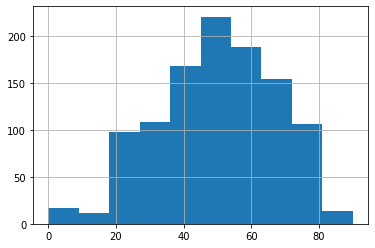

In [15]:
temp_data = data['Age Bracket']
temp_data = temp_data.replace(['Unspecified', 'NaN'])
temp_data = temp_data.replace(['unspecified', 'NaN'])
temp_data = temp_data.dropna(how='all')
print(temp_data)
temp_data = temp_data.astype('int64')
temp_data.hist()

愛知のデータ

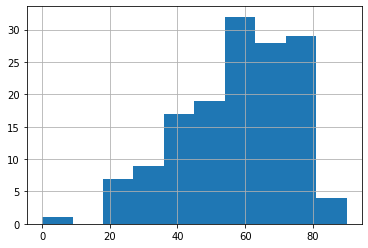

In [16]:
temp_data = aichi_data['Age Bracket']
temp_data = temp_data.replace(['Unspecified', 'NaN'])
temp_data = temp_data.replace(['unspecified', 'NaN'])
temp_data = temp_data.dropna(how='all')
temp_data = temp_data.astype('int64')
temp_data.hist()

### 性別の割合

全国のデータ

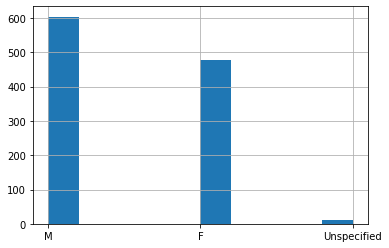

In [17]:
temp_data = data['Gender']
temp_data = temp_data.dropna(how='all')
temp_data.hist()

愛知のデータ

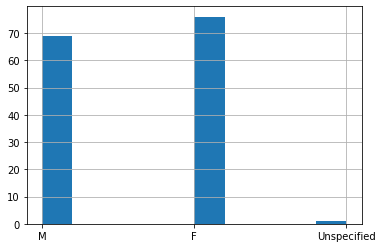

In [18]:
temp_data = aichi_data['Gender']
temp_data = temp_data.dropna(how='all')
temp_data.hist()

#### 陽性患者数（1日当たりの増加数）
全国のデータ

<BarContainer object of 55 artists>

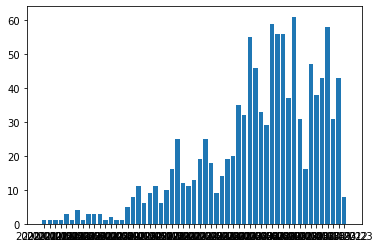

In [19]:
temp_data = data.groupby('Date Announced')['Status'].apply(len)
plt.bar(temp_data.index, temp_data, linewidth=0)

愛知のデータ

<BarContainer object of 37 artists>

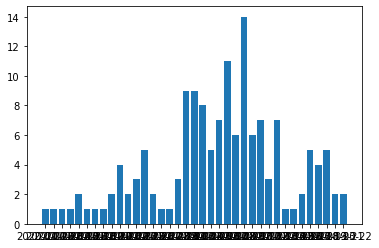

In [20]:
temp_data = aichi_data.groupby('Date Announced')['Status'].apply(len)
plt.bar(temp_data.index, temp_data, linewidth=0)

# References

- https://www.kaggle.com/imdevskp/covid-19-analysis-viz-prediction-comparisons
- https://pythondatascience.plavox.info/matplotlib/%E6%A3%92%E3%82%B0%E3%83%A9%E3%83%95